# 04. Image brightness

find a method, which properly describes the brightnes of an image

In [203]:
from PIL import Image
from PIL.ImageStat import Stat
import pandas as pd
import numpy as np
import os
import math
from os.path import isfile, join
from os import listdir

### Using PIL to check the brightness of a picuture

In [4]:
img = Image.open("../00_data/00_test_pic/dog.jpg")

In [33]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
img_gray = img.convert("L")

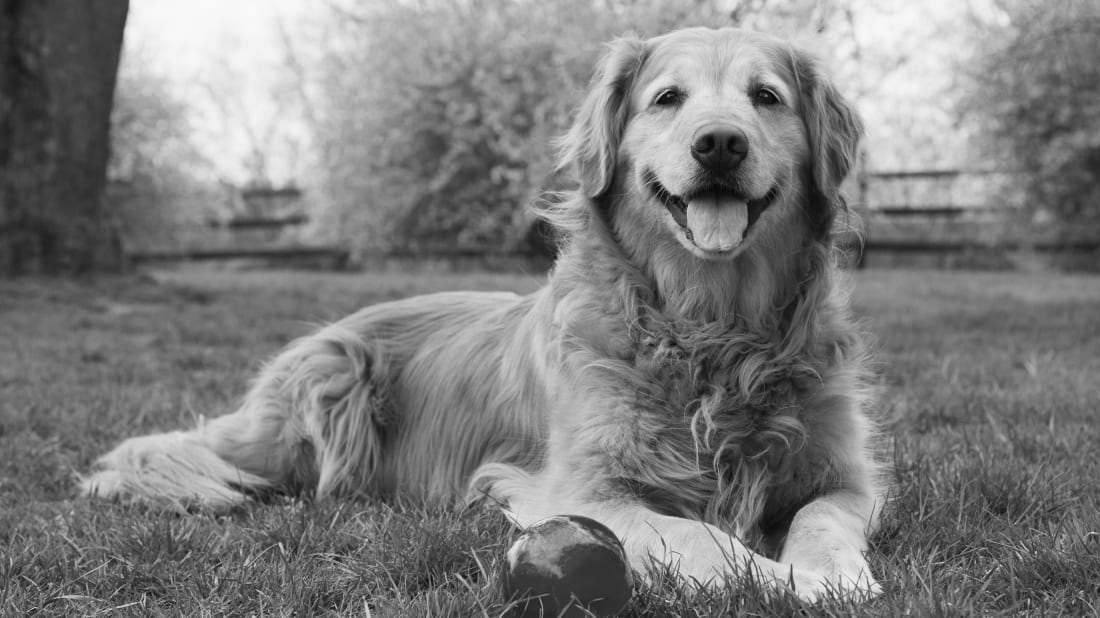

In [31]:
img_gray

In [43]:
img_data = img.getdata # returns a flat list

In [52]:
img_arr = np.array(img) # returns a np.array representing the image

In [54]:
img_arr 

array([[[ 47,  48,  40],
        [ 46,  47,  39],
        [ 44,  45,  37],
        ...,
        [189, 168,  87],
        [185, 164,  81],
        [184, 162,  77]],

       [[ 47,  48,  40],
        [ 46,  47,  39],
        [ 44,  45,  37],
        ...,
        [188, 167,  84],
        [185, 165,  79],
        [184, 162,  76]],

       [[ 47,  48,  40],
        [ 46,  47,  39],
        [ 43,  44,  36],
        ...,
        [188, 168,  81],
        [185, 165,  76],
        [185, 164,  75]],

       ...,

       [[ 71,  89,  47],
        [ 70,  90,  39],
        [133, 155,  93],
        ...,
        [119, 142,  62],
        [ 89, 112,  30],
        [ 81, 104,  22]],

       [[ 71,  92,  49],
        [103, 123,  70],
        [126, 148,  83],
        ...,
        [127, 150,  70],
        [ 93, 116,  36],
        [ 92, 115,  33]],

       [[ 66,  88,  42],
        [ 85, 108,  52],
        [110, 133,  63],
        ...,
        [127, 150,  72],
        [ 92, 116,  38],
        [ 91, 115,  37]]

In [69]:
img = Image.open("../00_data/00_test_pic/dog.jpg")
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [83]:
stat = Stat(img)
r,g,b = stat.mean

In [89]:
stat.rms
# https://pillow.readthedocs.io/en/3.1.x/reference/ImageStat.html?highlight=stats

[150.75748703961457, 138.59007447774954, 96.05338817764839]

In [95]:
gray = Image.open("../00_data/00_test_pic/dog.jpg").convert("L")
stat_g = Stat(gray)
stat_g.rms[0]

135.6794384700067

In [106]:
#########################

In [190]:
def image_brightness (file_path):
    
    img = Image.open(file_path).convert("L")
    stat = Stat(img)
    brightness = stat.rms[0] #RMS = root-mean-square for each band in the image
    
    brightness_dict = {"file_path" : [file_path],
            "brightness" : [brightness]}
    
    df = pd.DataFrame.from_dict(brightness_dict)
    
    return df

In [107]:
#########################

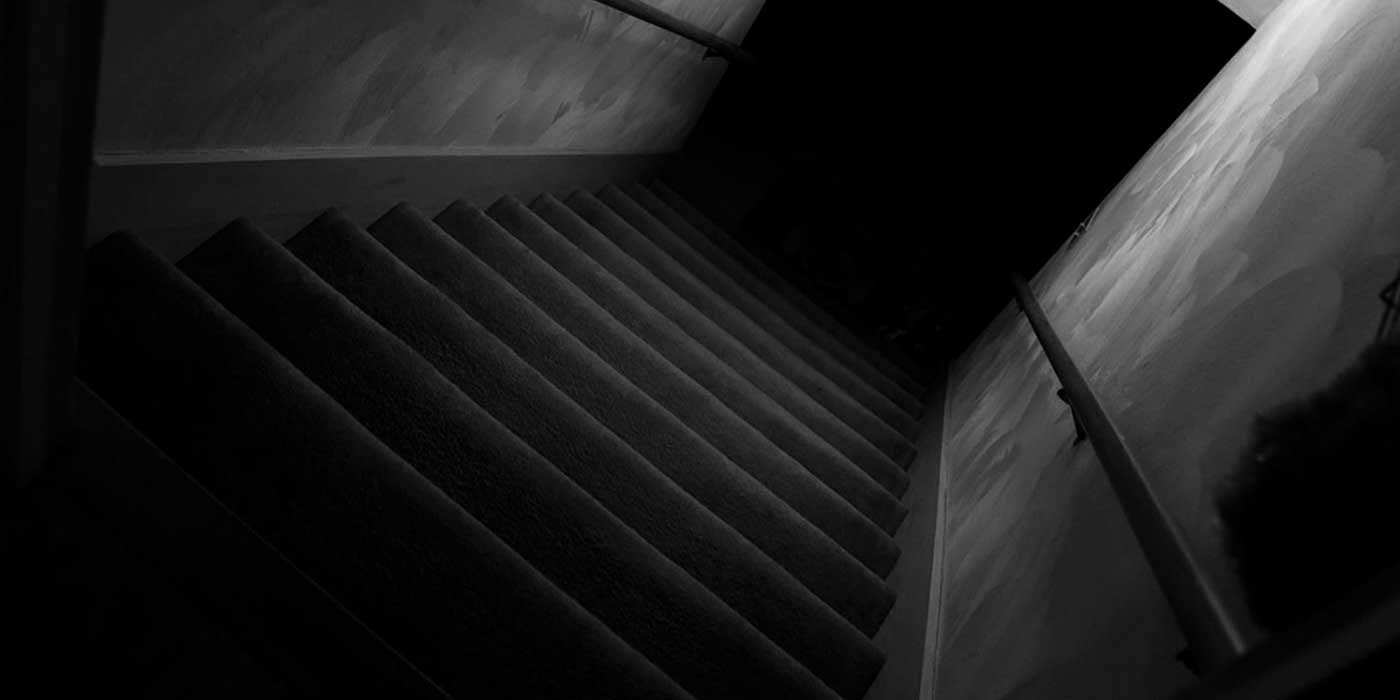

In [191]:
#test it on a dark picture
Image.open("/Users/Tianwang/IRONHACK/GIT/06_color_mix_match/00_data/00_test_pic_brightness/Dark-stairs-staircase.jpg")

In [192]:
gray = Image.open("/Users/Tianwang/IRONHACK/GIT/06_color_mix_match/00_data/00_test_pic_brightness/Dark-stairs-staircase.jpg").convert("L")
stat_g = Stat(gray)
stat_g.rms[0]

46.91492393423549

In [193]:
# test it on a bright picture

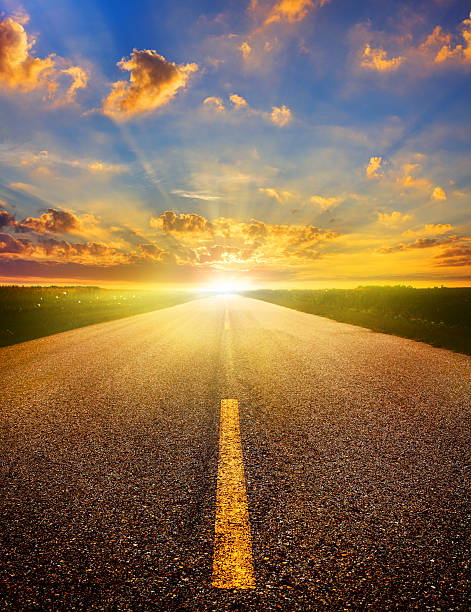

In [103]:
Image.open("/Users/Tianwang/IRONHACK/GIT/06_color_mix_match/00_data/00_test_pic_brightness/istockphoto-187066094-612x612.jpg")

In [194]:
gray = Image.open("/Users/Tianwang/IRONHACK/GIT/06_color_mix_match/00_data/00_test_pic_brightness/istockphoto-187066094-612x612.jpg").convert("L")
stat_g = Stat(gray)
stat_g.rms[0]

128.56661210966945

In [195]:
image_brightness ("/Users/Tianwang/IRONHACK/GIT/06_color_mix_match/00_data/00_test_pic_brightness/istockphoto-187066094-612x612.jpg")
   

,file_path,brightness
0,/Users/Tianwang/IRONHACK/GIT/06_color_mix_matc...,128.566612


### Alternative to the Pillow Method described above, convert RGB to HSV (Hue, Saturation and Value) can also be an option

In [121]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [132]:
img_b = cv2.imread("../00_data/00_test_pic/dog.jpg", 1)

In [133]:
type(img_b)

numpy.ndarray

In [134]:
img_hsv = cv2.cvtColor(img_b, cv2.COLOR_BGR2HSV)


In [137]:
img_hsv

array([[[ 34,  43,  48],
        [ 34,  43,  47],
        [ 35,  34,  45],
        ...,
        [ 25, 136, 187],
        [ 24, 143, 185],
        [ 24, 148, 183]],

       [[ 34,  43,  48],
        [ 34,  43,  47],
        [ 35,  34,  45],
        ...,
        [ 25, 140, 186],
        [ 24, 146, 185],
        [ 24, 149, 183]],

       [[ 34,  43,  48],
        [ 34,  43,  47],
        [ 34,  46,  44],
        ...,
        [ 24, 145, 188],
        [ 24, 151, 186],
        [ 24, 152, 185]],

       ...,

       [[ 43, 127,  90],
        [ 42, 144,  90],
        [ 42, 102, 155],
        ...,
        [ 38, 143, 141],
        [ 38, 187, 112],
        [ 38, 201, 104]],

       [[ 44, 129,  93],
        [ 43, 111, 124],
        [ 40, 112, 148],
        ...,
        [ 39, 136, 150],
        [ 39, 176, 116],
        [ 39, 177, 115]],

       [[ 44, 136,  88],
        [ 43, 127, 108],
        [ 40, 130, 133],
        ...,
        [ 39, 136, 150],
        [ 39, 176, 116],
        [ 39, 177, 115]]

In [140]:
# all HSV - V-values per in each row of the image
img_hsv[:,:,2]

array([[ 48,  47,  45, ..., 187, 185, 183],
       [ 48,  47,  45, ..., 186, 185, 183],
       [ 48,  47,  44, ..., 188, 186, 185],
       ...,
       [ 90,  90, 155, ..., 141, 112, 104],
       [ 93, 124, 148, ..., 150, 116, 115],
       [ 88, 108, 133, ..., 150, 116, 115]], dtype=uint8)

In [142]:
h = []
s = []
v = []

for line in img_hsv:
    for pixel in line:
        temp_h, temp_s, temp_v = pixel
        h.append(temp_h)
        s.append(temp_s)
        v.append(temp_v)

In [149]:
type(v)

list

In [153]:
average_v = sum(v)/len(v)
average_v

146.57677552221242

In [154]:
average_h = sum(h)/len(h)
average_h

32.458599588114154

In [155]:
average_s = sum(s)/len(s)
average_s

135.89380553103854

In [157]:
cv2.imshow("image_hue", img_hsv)
cv2.waitKey(1000)

-1

### Put the HSV image processing into a function:
    

In [184]:
def calc_hsv (file_path):
    img = cv2.imread(file_path, 1)
    if img is None: 
        print("Error, image could not be loaded properly")
    else: 
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h = []
    s = []
    v = []

    for line in img_hsv:
        for pixel in line:
            temp_h, temp_s, temp_v = pixel
            h.append(temp_h)
            s.append(temp_s)
            v.append(temp_v)
    
    average_h = round(sum(h)/len(h),4)
    average_s = round(sum(s)/len(s),4)
    average_v = round(sum(v)/len(v),4)
    
    df = {"file" : [file_path], 
          "average_h" : [average_h],
          "average_s" : [average_s], 
          "average_v" : [average_v]}
    
    df = pd.DataFrame.from_dict(df)

    return df

In [185]:
calc_hsv("../00_data/00_test_pic/dog.jpg")

,file,average_h,average_s,average_v
0,../00_data/00_test_pic/dog.jpg,32.4586,135.8938,146.5768


In [186]:
calc_hsv("../00_data/00_test_pic_brightness/istockphoto-187066094-612x612.jpg")

,file,average_h,average_s,average_v
0,../00_data/00_test_pic_brightness/istockphoto-...,42.635,144.357,146.7617


In [187]:
calc_hsv("../00_data/00_test_pic_brightness/Dark-stairs-staircase.jpg")

,file,average_h,average_s,average_v
0,../00_data/00_test_pic_brightness/Dark-stairs-...,0.0,0.0,28.9773


In [188]:
calc_hsv("../00_data/00_test_pic_brightness/maxresdefault.jpg")

,file,average_h,average_s,average_v
0,../00_data/00_test_pic_brightness/maxresdefaul...,30.9233,171.6711,95.043


### Update the function, such that it take in all files within 1 folder

In [218]:
def image_brightness (path_to_library):
    
    file_list = [f for f in listdir(path_to_library) if isfile(join(path_to_library, f))] # read all files in the path_to_library file and put them into a list
    brightness_dict = {"file_path" : [],
                       "brightness" : []}
    df = pd.DataFrame.from_dict(brightness_dict)
    
    for file_path in file_list:
    
        img = Image.open(path_to_library + "/" + file_path).convert("L")
        stat = Stat(img)
        brightness = stat.rms[0] #RMS = root-mean-square for each band in the image
        
        df = df.append({"file_path" : file_path,
                        "brightness" : brightness}, ignore_index = True)
        
    return df

In [219]:
image_brightness ("../00_data/00_test_pic_brightness/")

,file_path,brightness
0,Dark-stairs-staircase.jpg,46.914924
1,maxresdefault.jpg,105.747450
2,bright.jpg,170.285783
3,istockphoto-187066094-612x612.jpg,128.566612


In [228]:
def calc_hsv (path_to_library):
    
    file_list = [f for f in listdir(path_to_library) if isfile(join(path_to_library, f))]
    
    df = {"file" : [], 
          "average_h" : [],
          "average_s" : [], 
          "average_v" : []}
    
    df = pd.DataFrame.from_dict(df)
    
    for file_path in file_list:
        
        img = cv2.imread(path_to_library + "/" + file_path, 1)
        
        if img is None: 
            print("Error, image could not be loaded properly")
        else: 
            img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            h = []
            s = []
            v = []
    
            for line in img_hsv:
                for pixel in line:
                    temp_h, temp_s, temp_v = pixel
                    h.append(temp_h)
                    s.append(temp_s)
                    v.append(temp_v)
            
            average_h = round(sum(h)/len(h),4)
            average_s = round(sum(s)/len(s),4)
            average_v = round(sum(v)/len(v),4)
            
            df = df.append ({"file" : file_path, 
                             "average_h" : average_h,
                             "average_s" : average_s, 
                             "average_v" : average_v}, ignore_index = True)
    return df

In [229]:
calc_hsv("../00_data/00_test_pic_brightness/")

,file,average_h,average_s,average_v
0,Dark-stairs-staircase.jpg,0.0000,0.0000,28.9773
1,maxresdefault.jpg,30.9233,171.6711,95.0430
2,bright.jpg,97.1707,103.6737,198.3663
3,istockphoto-187066094-612x612.jpg,42.6350,144.3570,146.7617
